<a href="https://colab.research.google.com/github/falken20/Colaboratory/blob/master/COVID_analysing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the neccesary libraries
import pandas as pd
import numpy as np
from datetime import date

In [ ]:
# Get the number of the today day
day = int(str(date.today())[-2:])
print(day)

21


In [ ]:
# Get the data for every month
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports'
list_urls = []
# Add links for every day data in September
for i in range(1, 31):
    if i <= 9:
        list_urls.append(str(url + f'/09-0{i}-2020.csv'))
    else:
        list_urls.append(str(url + f'/09-{i}-2020.csv'))
# Add links for every day in the current month
for i in range(1,day):
    if i <= 9:
        list_urls.append(str(url + f'/10-0{i}-2020.csv'))
    else:
        list_urls.append(str(url + f'/10-{i}-2020.csv'))

In [ ]:
# Transform the urls in a dataframe and these in a list
list_data = []
for i in list_urls:
  df = pd.read_csv(i)
  df_spain = df[df['Country_Region'] == 'Spain'] 
  np.array(df_spain)
  list_data.append(df_spain)
list_data[3].head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
576,NaN,NaN,Andalusia,Spain,2020-09-05 04:28:19,37.544300,-4.727800,33687,1516,10671,21500.0,"Andalusia, Spain",399.731590,4.500252
577,NaN,NaN,Aragon,Spain,2020-09-05 04:28:19,41.597600,-0.905700,27493,1212,3772,22509.0,"Aragon, Spain",2081.878802,4.408395
578,NaN,NaN,Asturias,Spain,2020-09-05 04:28:19,43.361400,-5.859300,3498,335,1063,2100.0,"Asturias, Spain",342.201418,9.576901
579,NaN,NaN,Baleares,Spain,2020-09-05 04:28:19,39.710358,2.995148,9191,243,1533,7415.0,"Baleares, Spain",773.509956,2.643891
580,NaN,NaN,C. Valenciana,Spain,2020-09-05 04:28:19,39.484000,-0.753300,26710,1478,9970,15262.0,"C. Valenciana, Spain",536.887768,5.533508


In [ ]:
# Get the column info del DataFrame
list_data[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 576 to 595
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 0 non-null      float64
 1   Admin2               0 non-null      object 
 2   Province_State       20 non-null     object 
 3   Country_Region       20 non-null     object 
 4   Last_Update          20 non-null     object 
 5   Lat                  19 non-null     float64
 6   Long_                19 non-null     float64
 7   Confirmed            20 non-null     int64  
 8   Deaths               20 non-null     int64  
 9   Recovered            20 non-null     int64  
 10  Active               20 non-null     float64
 11  Combined_Key         20 non-null     object 
 12  Incidence_Rate       19 non-null     float64
 13  Case-Fatality_Ratio  19 non-null     float64
dtypes: float64(6), int64(3), object(5)
memory usage: 2.3+ KB


In [ ]:
# Generate descriptive statistics, round to 2 decimals
round(list_data[0].describe(), 2)

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,0.0,19.00,19.00,20.00,20.00,20.00,20.00,19.00,19.00
mean,NaN,39.76,-3.68,23548.65,1457.60,7518.80,14572.25,935.82,5.57
std,NaN,3.68,4.11,34634.01,2205.54,10139.45,22950.31,604.11,3.18
min,NaN,28.29,-16.63,0.00,0.00,0.00,0.00,328.11,0.56
25%,NaN,38.64,-5.02,4918.25,209.25,1536.00,1973.25,429.26,3.48
50%,NaN,40.42,-3.10,9236.00,531.00,3439.50,5643.00,701.64,5.23
75%,NaN,42.43,-1.40,27292.75,1519.75,9395.50,15464.25,1424.50,6.59
max,NaN,43.36,3.00,128178.00,8662.00,40736.00,78780.00,2017.36,12.60


In [ ]:
# Create the lists for the graphs
list_dead_cases = []
list_confirmed_cases = []
list_recovered_cases = []

# Sum the number of cases in every day
for i in range(0, len(list_data)):
  list_dead_cases.append((list_data[i]['Deaths']).sum())
  list_confirmed_cases.append((list_data[i]['Confirmed']).sum())
  list_recovered_cases.append((list_data[i]['Recovered']).sum())

print(len(list_dead_cases), list_dead_cases)
print(len(list_confirmed_cases), list_confirmed_cases)
print(len(list_recovered_cases), list_recovered_cases)

50 [29152, 29194, 29234, 29418, 29418, 29418, 29516, 29594, 29628, 29699, 29747, 29747, 29747, 29848, 30004, 30243, 30405, 30495, 30495, 30495, 30663, 30904, 31034, 31118, 31232, 31232, 31232, 31411, 31411, 31791, 31973, 32086, 32086, 32086, 32225, 32486, 32562, 32688, 32929, 32929, 32929, 33124, 33204, 33413, 33553, 33775, 33775, 33775, 33992, 34210]
50 [470973, 479554, 488513, 498989, 498989, 498989, 525549, 534513, 543379, 554143, 566326, 566326, 566326, 593730, 603167, 614360, 625651, 640040, 640040, 640040, 671468, 682267, 693556, 704209, 716481, 716481, 716481, 748266, 748266, 769188, 778607, 789932, 789932, 789932, 813412, 825410, 835901, 848324, 861112, 861112, 861112, 888968, 896086, 908056, 921374, 936560, 936560, 936560, 974449, 988322]
50 [150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376, 150376

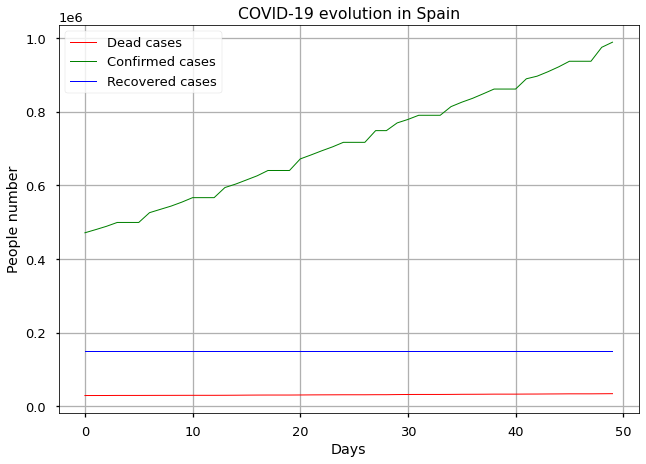

In [ ]:
# Create the graph
from matplotlib import pyplot as plt
x = [i for i in range(0, len(list_dead_cases))]
plt.style.use('seaborn-talk')
plt.plot(x, list_dead_cases, color='red', label='Dead cases', linewidth=1.0)
plt.plot(x, list_confirmed_cases, color='green', label='Confirmed cases', linewidth=1.0)
plt.plot(x, list_recovered_cases, color='blue', label='Recovered cases', linewidth=1.0)
plt.xlabel('Days')
plt.ylabel('People number')
plt.title('COVID-19 evolution in Spain')
plt.grid(True)
plt.legend(loc='upper left')
# plt.savefig('corona.png')
plt.show()

In [51]:
# Create a heat map with the values
import folium
import math
from folium.plugins import HeatMap
mapa = folium.Map(location=[43,0], zoom_start=5, tiles='Stamen Toner', width='50%', height='80%')
locais = []

for c in range(0, len(list_data)):
    for lat,lon in zip(list_data[c]['Lat'], list_data[c]['Long_']):
        if math.isnan(lat) == True or math.isnan(lon) == True:
            pass
        else:
            temp = [lat,lon]
            locais.append(temp)


HeatMap(locais, radius=16).add_to(mapa)
mapa.save('corona_mapa.html')

In [52]:
mapa